In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import numpy as np
df = pd.DataFrame(pd.read_csv("rmse_cos1.txt", sep=" "))
#df=df[df['lengthscale']<=0.3]
df.shape

(1420, 4)

In [2]:
order = pd.DataFrame(pd.read_csv("rmse_cos1115.txt", sep=" "))
order = order.sort_values(by=['lengthscale', 'l2regularizer'])
order = order.reset_index(drop=True)
with open("rmse_cos1.txt", 'a') as f:
    dfAsString = order.to_string(header=False, index=False)
    f.write(dfAsString)
order

,lengthscale,l2regularizer,rmse_mean,rmse_std
0,0.05,0.05,1.088565,0.520429
1,0.05,0.10,1.087458,0.526065
2,0.05,0.15,1.069103,0.504786
3,0.05,0.20,1.086325,0.527360
4,0.05,0.25,1.089260,0.528457
...,...,...,...,...
1411,1.00,0.80,0.996677,0.452701
1412,1.00,0.85,0.996601,0.452660
1413,1.00,0.90,0.996396,0.452633
1414,1.00,0.95,0.996285,0.452525


In [3]:
#find the missing one
for i in np.unique(df['lengthscale']):
    print(i)
    print(df[df['lengthscale']==i].shape)
#print(df[df['lengthscale']==0.25])

0.05
(20, 4)
0.075
(20, 4)
0.1
(20, 4)
0.125
(20, 4)
0.15
(20, 4)
0.175
(20, 4)
0.2
(20, 4)
0.205
(20, 4)
0.21
(20, 4)
0.215
(20, 4)
0.22
(20, 4)
0.225
(20, 4)
0.23
(20, 4)
0.235
(20, 4)
0.24
(20, 4)
0.245
(20, 4)
0.25
(20, 4)
0.255
(20, 4)
0.26
(20, 4)
0.265
(20, 4)
0.27
(20, 4)
0.275
(20, 4)
0.28
(20, 4)
0.285
(20, 4)
0.29
(20, 4)
0.295
(20, 4)
0.3
(20, 4)
0.305
(20, 4)
0.31
(20, 4)
0.315
(20, 4)
0.32
(20, 4)
0.325
(20, 4)
0.33
(20, 4)
0.335
(20, 4)
0.34
(20, 4)
0.345
(20, 4)
0.35
(20, 4)
0.355
(20, 4)
0.36
(20, 4)
0.365
(20, 4)
0.37
(20, 4)
0.375
(20, 4)
0.38
(20, 4)
0.385
(20, 4)
0.39
(20, 4)
0.395
(20, 4)
0.4
(20, 4)
0.425
(20, 4)
0.45
(20, 4)
0.475
(20, 4)
0.5
(20, 4)
0.525
(20, 4)
0.55
(20, 4)
0.575
(20, 4)
0.6
(20, 4)
0.625
(20, 4)
0.65
(20, 4)
0.675
(20, 4)
0.7
(20, 4)
0.725
(20, 4)
0.75
(20, 4)
0.775
(20, 4)
0.8
(20, 4)
0.825
(20, 4)
0.85
(20, 4)
0.875
(20, 4)
0.9
(20, 4)
0.925
(20, 4)
0.95
(20, 4)
0.975
(20, 4)
1.0
(20, 4)


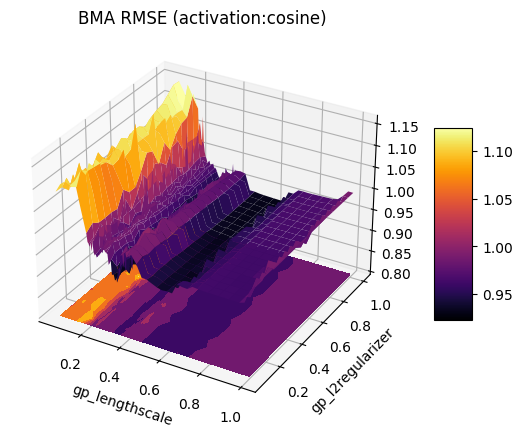

In [4]:
fig = plt.figure(figsize= (10,5))
rmse_mean_plot = df['rmse_mean'].values.reshape(len(np.unique(df['lengthscale'])), len(np.unique(df['l2regularizer'])))
ax = plt.axes(projection='3d')
x_grid, y_grid = df['lengthscale'].values.reshape(len(np.unique(df['lengthscale'])), len(np.unique(df['l2regularizer']))), df['l2regularizer'].values.reshape(len(np.unique(df['lengthscale'])), len(np.unique(df['l2regularizer'])))
surf = ax.plot_surface(X=x_grid, Y=y_grid, Z=rmse_mean_plot, cmap='inferno', 
                       edgecolor ='none')


fig.colorbar(surf, ax = ax,
             shrink = 0.5, aspect = 5)
ax.set_title('BMA RMSE (activation:cosine)')
ax.set_xlabel('gp_lengthscale')
ax.set_ylabel('gp_l2regularizer')
 
cset = ax.contourf(X=x_grid, Y=y_grid, Z=rmse_mean_plot,
                zdir ='z',
                offset = 0.8,
                cmap = 'inferno')
# #cset = ax.contourf(x, y, z,
#                    zdir ='x',
#                    offset =-5,
#                    cmap = my_cmap)
# #cset = ax.contourf(x, y, z,
#                    zdir ='y',
#                    offset = 5,
#                    cmap = my_cmap)

ax.set_zlim(0.8, np.max(rmse_mean_plot))
# show plot
plt.show()

In [5]:
print(df[df['rmse_mean']==np.min(df['rmse_mean'])])
print(df[df['rmse_std']==np.min(df['rmse_std'])])

     lengthscale  l2regularizer  rmse_mean  rmse_std
684         0.34           0.25   0.913574  0.441922
     lengthscale  l2regularizer  rmse_mean  rmse_std
384        0.265           0.25   0.999443  0.381198


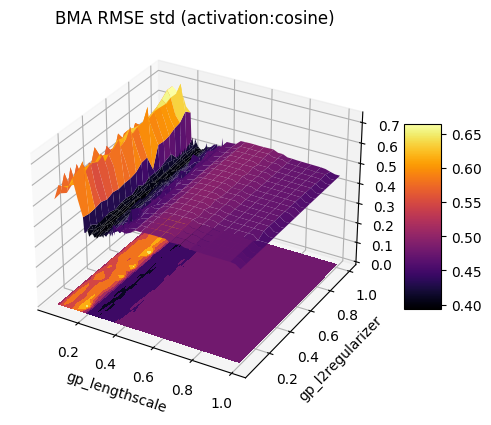

In [6]:
rmse_std_plot = df['rmse_std'].values.reshape(len(np.unique(df['lengthscale'])), len(np.unique(df['l2regularizer'])))
ax = plt.axes(projection='3d')
x_grid, y_grid = df['lengthscale'].values.reshape(len(np.unique(df['lengthscale'])), len(np.unique(df['l2regularizer']))), df['l2regularizer'].values.reshape(len(np.unique(df['lengthscale'])), len(np.unique(df['l2regularizer'])))
surf = ax.plot_surface(X=x_grid, Y=y_grid, Z=rmse_std_plot, cmap='inferno', 
                       edgecolor ='none')
fig.colorbar(surf, ax = ax,
             shrink = 0.5, aspect = 5)
ax.set_title('BMA RMSE std (activation:cosine)')
ax.set_xlabel('gp_lengthscale')
ax.set_ylabel('gp_l2regularizer')
 
cset = ax.contourf(X=x_grid, Y=y_grid, Z=rmse_std_plot,
                zdir ='z',
                 offset = 0,
                   cmap = 'inferno')
# #cset = ax.contourf(x, y, z,
#                    zdir ='x',
#                    offset =-5,
#                    cmap = my_cmap)
# #cset = ax.contourf(x, y, z,
#                    zdir ='y',
#                    offset = 5,
#                    cmap = my_cmap)

ax.set_zlim(0, np.max(rmse_std_plot))
# show plot
plt.show()